In [105]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# 1. cleansing data

In [106]:
# Inisiasi data raw yang masih terpisah
df_twit1 = pd.read_csv('twitlpdp_1.csv')
# df_twit2 = pd.read_csv('twitlpdp_2.csv')
# df_twit3 = pd.read_csv('twitlpdp_3.csv')
# df_twit4 = pd.read_csv('twitlpdp_4.csv')
# df_twit5 = pd.read_csv('twitlpdp_5.csv')

In [107]:
# Cek jumlah data
print(f"Jumlah record: {len(df_twit1)}")
# print(f"Jumlah record: {len(df_twit2)}")
# print(f"Jumlah record: {len(df_twit3)}")
# print(f"Jumlah record: {len(df_twit4)}")
# print(f"Jumlah record: {len(df_twit5)}")


Jumlah record: 6497


In [108]:
# Concatenation semua data, tampung dalam df
display(df_twit1)


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1801663711133995138,Fri Jun 14 17:11:16 +0000 2024,0,Temenku jg gini kok. LPDP S2 d negeri paman Sa...,1801663711133995138,NaN,NaN,in,NaN,0,0,0,https://x.com/Anggun_srii/status/1801663711133...,773567852,Anggun_srii
1,1801663002514755603,Fri Jun 14 17:08:27 +0000 2024,0,apply LPDP kali ye,1801663002514755603,NaN,NaN,und,they/any,0,0,0,https://x.com/176_056200/status/18016630025147...,1155160712282439680,176_056200
2,1801660780817138166,Fri Jun 14 16:59:38 +0000 2024,0,tsudaken please bayarin uang kuliahku dan biay...,1801660780817138166,NaN,NaN,in,NaN,0,0,0,https://x.com/stepisthewinner/status/180166078...,1611603696248573953,stepisthewinner
3,1801577314209448273,Fri Jun 14 16:44:48 +0000 2024,0,@bturn2c coba aja lu gass lpdp batch 2 buka ta...,1801657050365366473,NaN,bibequwu,in,NaN,0,0,0,https://x.com/hagyahagiaky/status/180165705036...,1782253730869755904,hagyahagiaky
4,1801578582621515868,Fri Jun 14 16:36:21 +0000 2024,59,8. Fresh grad Aku FG lulus S1 Sept 23. Ga masa...,1801654922318123193,NaN,aurewliaa,in,NaN,3,2,3,https://x.com/aurewliaa/status/180165492231812...,1740030080439685120,aurewliaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1772062331700441194,Mon Mar 25 00:45:57 +0000 2024,0,Hallo!! Bagi kalian yang sedang cari Tes TOEFL...,1772062331700441194,NaN,NaN,in,NaN,0,0,0,https://x.com/xnhanaaa/status/1772062331700441194,1338820612437864449,xnhanaaa
6493,1772061200052068491,Mon Mar 25 00:41:28 +0000 2024,1,MAHIR SPEAKING &amp; GRAMMAR SEKALIGUS‼️ Impro...,1772061200052068491,https://pbs.twimg.com/media/GJegLkjaoAAJoaT.jpg,NaN,in,NaN,0,0,0,https://x.com/xnhanaaa/status/1772061200052068491,1338820612437864449,xnhanaaa
6494,1772016052853211490,Mon Mar 25 00:08:53 +0000 2024,0,@carmelinadira Tapi netizen ga rela duit LPDP ...,1772053000376172650,NaN,carmelinadira,in,NaN,0,1,0,https://x.com/pratistampan/status/177205300037...,481293166,pratistampan
6495,1772051658622853593,Mon Mar 25 00:03:33 +0000 2024,0,Doljong lpdp.,1772051658622853593,NaN,NaN,nl,TangGRUNGE Selatan,0,0,0,https://x.com/andariisset/status/1772051658622...,64345152,andariisset


In [109]:
# cek data
df_twit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      6497 non-null   int64 
 1   created_at               6497 non-null   object
 2   favorite_count           6497 non-null   int64 
 3   full_text                6495 non-null   object
 4   id_str                   6497 non-null   int64 
 5   image_url                1180 non-null   object
 6   in_reply_to_screen_name  2953 non-null   object
 7   lang                     6497 non-null   object
 8   location                 3855 non-null   object
 9   quote_count              6497 non-null   int64 
 10  reply_count              6497 non-null   int64 
 11  retweet_count            6497 non-null   int64 
 12  tweet_url                6497 non-null   object
 13  user_id_str              6497 non-null   int64 
 14  username                 6497 non-null  

In [110]:
# convert date
df_twit1['created_at'] = df_twit1['created_at'].apply(lambda x: pd.to_datetime(x))

In [111]:
# Filter the DataFrame to include only rows from June 2024 (10 hari terakhir menjelang pengumuman)
df_june = df_twit1[(df_twit1['created_at'] >= '2024-06-09 00:00:00+00:00') & (df_twit1['created_at'] <= '2024-06-10 23:59:59+00:00')]

display(df_june)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
2003,1800304089059967076,2024-06-10 23:40:04+00:00,0,@cutiepiejin0412 Sending virtual hug!!! Ayo pe...,1800312001648075151,NaN,cutiepiejin0412,in,NaN,0,1,0,https://x.com/geeeziye/status/1800312001648075151,1671159009490141185,geeeziye
2004,1800311472758898800,2024-06-10 23:37:57+00:00,9099,Officially Ph.D candidate of Leiden University...,1800311472758898800,https://pbs.twimg.com/media/GPv9vZ9awAAlOLr.jpg,NaN,en,"I, Cassiopeia Dworkin. XIII.",423,278,478,https://x.com/visceralstars/status/18003114727...,1630422849700909056,visceralstars
2005,1800194113826177261,2024-06-10 23:34:56+00:00,4,@ibamarief Bahkan yg di dalam negeri tiap tahu...,1800310711249465437,NaN,ibamarief,in,Indonesia,0,0,1,https://x.com/rcahyantari/status/1800310711249...,54496705,rcahyantari
2006,1800310094267351454,2024-06-10 23:32:29+00:00,24,Bangkeeeee.... Gini rasanya lolos LPDP... Saat...,1800310094267351454,https://pbs.twimg.com/media/GPv8fZRaIAA4gmF.jpg,NaN,in,NaN,0,7,1,https://x.com/bakteribayk/status/1800310094267...,73774703,bakteribayk
2007,1800309545698488831,2024-06-10 23:30:18+00:00,0,Bahagia dan senang liat orang-orang yang keter...,1800309545698488831,NaN,NaN,in,"Pinkney, England",0,0,0,https://x.com/hairba_nd_/status/18003095456984...,1779148103972753408,hairba_nd_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,1799633228959252566,2024-06-09 02:42:52+00:00,0,OPEN JOKI ESAI BEASISWA/MOTLET/DLL - Esai IISM...,1799633228959252566,NaN,NaN,in,Indonesia,0,0,0,https://x.com/cinephileperiod/status/179963322...,1262923280626810880,cinephileperiod
2297,1799558618150543634,2024-06-09 02:24:20+00:00,0,@BaseAnakFK Ada LPDP sama Hospital Based. Kalo...,1799628565711065253,NaN,BaseAnakFK,in,Manado,0,0,0,https://x.com/reinaldomaramis/status/179962856...,60585660,reinaldomaramis
2298,1799064259726594444,2024-06-09 02:09:58+00:00,6,@AsaSemesta @tanyarlfes apa salahnya dia pake ...,1799624953509314954,NaN,AsaSemesta,in,Jonggol,0,1,0,https://x.com/galuhnakulo/status/1799624953509...,1842647515,galuhnakulo
2299,1799064259726594444,2024-06-09 02:07:36+00:00,0,@cloudifans @AsaSemesta @tanyarlfes Privilege ...,1799624354134978701,NaN,llavenderfog,in,"Minnesota, USA",0,0,0,https://x.com/llavenderfog/status/179962435413...,1383683842792321027,llavenderfog


In [112]:
# cek jumlah record yang mengandung missing values pada tiap kolom
df_june.isna().sum()

conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                       0
image_url                  258
in_reply_to_screen_name    191
lang                         0
location                   140
quote_count                  0
reply_count                  0
retweet_count                0
tweet_url                    0
user_id_str                  0
username                     0
dtype: int64

In [113]:
# Print all column names
print(df_june.columns)

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


In [114]:
# Display rows where 'full_text' is null
null_full_text_rows = df_june[df_june['full_text'].isnull()]

display(null_full_text_rows)


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username


In [115]:
# Drop rows where 'full_text' is null
df_june.dropna(subset=['full_text'], inplace=True)

display(df_june)

C:\Users\aldy.nugraha\AppData\Local\Temp\ipykernel_11276\1686641824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june.dropna(subset=['full_text'], inplace=True)


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
2003,1800304089059967076,2024-06-10 23:40:04+00:00,0,@cutiepiejin0412 Sending virtual hug!!! Ayo pe...,1800312001648075151,NaN,cutiepiejin0412,in,NaN,0,1,0,https://x.com/geeeziye/status/1800312001648075151,1671159009490141185,geeeziye
2004,1800311472758898800,2024-06-10 23:37:57+00:00,9099,Officially Ph.D candidate of Leiden University...,1800311472758898800,https://pbs.twimg.com/media/GPv9vZ9awAAlOLr.jpg,NaN,en,"I, Cassiopeia Dworkin. XIII.",423,278,478,https://x.com/visceralstars/status/18003114727...,1630422849700909056,visceralstars
2005,1800194113826177261,2024-06-10 23:34:56+00:00,4,@ibamarief Bahkan yg di dalam negeri tiap tahu...,1800310711249465437,NaN,ibamarief,in,Indonesia,0,0,1,https://x.com/rcahyantari/status/1800310711249...,54496705,rcahyantari
2006,1800310094267351454,2024-06-10 23:32:29+00:00,24,Bangkeeeee.... Gini rasanya lolos LPDP... Saat...,1800310094267351454,https://pbs.twimg.com/media/GPv8fZRaIAA4gmF.jpg,NaN,in,NaN,0,7,1,https://x.com/bakteribayk/status/1800310094267...,73774703,bakteribayk
2007,1800309545698488831,2024-06-10 23:30:18+00:00,0,Bahagia dan senang liat orang-orang yang keter...,1800309545698488831,NaN,NaN,in,"Pinkney, England",0,0,0,https://x.com/hairba_nd_/status/18003095456984...,1779148103972753408,hairba_nd_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,1799633228959252566,2024-06-09 02:42:52+00:00,0,OPEN JOKI ESAI BEASISWA/MOTLET/DLL - Esai IISM...,1799633228959252566,NaN,NaN,in,Indonesia,0,0,0,https://x.com/cinephileperiod/status/179963322...,1262923280626810880,cinephileperiod
2297,1799558618150543634,2024-06-09 02:24:20+00:00,0,@BaseAnakFK Ada LPDP sama Hospital Based. Kalo...,1799628565711065253,NaN,BaseAnakFK,in,Manado,0,0,0,https://x.com/reinaldomaramis/status/179962856...,60585660,reinaldomaramis
2298,1799064259726594444,2024-06-09 02:09:58+00:00,6,@AsaSemesta @tanyarlfes apa salahnya dia pake ...,1799624953509314954,NaN,AsaSemesta,in,Jonggol,0,1,0,https://x.com/galuhnakulo/status/1799624953509...,1842647515,galuhnakulo
2299,1799064259726594444,2024-06-09 02:07:36+00:00,0,@cloudifans @AsaSemesta @tanyarlfes Privilege ...,1799624354134978701,NaN,llavenderfog,in,"Minnesota, USA",0,0,0,https://x.com/llavenderfog/status/179962435413...,1383683842792321027,llavenderfog


In [116]:
# Print all column names
print(df_june.columns)

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


In [117]:
#Select data yang akan dipakai saja
df_june = df_june[['created_at', 'retweet_count', 'username', 'full_text']]
display(df_june)

,created_at,retweet_count,username,full_text
2003,2024-06-10 23:40:04+00:00,0,geeeziye,@cutiepiejin0412 Sending virtual hug!!! Ayo pe...
2004,2024-06-10 23:37:57+00:00,478,visceralstars,Officially Ph.D candidate of Leiden University...
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,@ibamarief Bahkan yg di dalam negeri tiap tahu...
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,Bangkeeeee.... Gini rasanya lolos LPDP... Saat...
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,Bahagia dan senang liat orang-orang yang keter...
...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,OPEN JOKI ESAI BEASISWA/MOTLET/DLL - Esai IISM...
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,@BaseAnakFK Ada LPDP sama Hospital Based. Kalo...
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,@AsaSemesta @tanyarlfes apa salahnya dia pake ...
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,@cloudifans @AsaSemesta @tanyarlfes Privilege ...


In [118]:
#cek null
df_june.isnull().sum()

created_at       0
retweet_count    0
username         0
full_text        0
dtype: int64

In [119]:
#cek duplikasi
df_june.duplicated().sum()

np.int64(0)

In [120]:
df_june.shape

(298, 4)

In [121]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text) # Remove RT
    text = re.sub(r'https?://\S+', '', text) # Remove links
    text = re.sub(r'[^A-Za-z0-9\s]', ' ', text) # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces

    return text

df_june['full_text'] = df_june['full_text'].apply(clean_twitter_text)

In [122]:
# ubah ke lowercase
df_june['full_text'] = df_june['full_text'].str.lower()

In [123]:
display(df_june)

,created_at,retweet_count,username,full_text
2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...
2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph d candidate of leiden university...
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan yg di dalam negeri tiap tahun ada evalu...
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia dan senang liat orang orang yang keter...
...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet dll esai iisma ...
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,ada lpdp sama hospital based kalo emang niat l...
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya dia pake lpdp orang cerdas tu pol...
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet de...


# 2. Preprocessing

- Normalisasi

In [124]:
# normalisasi slang abbreviation

slang_dict = {
    'gua': 'saya',
    'gw': 'saya',
    'sy': 'saya',
    'lu': 'kamu',
    'tdk': 'tidak',
    'ga': 'tidak',
    'gk': 'tidak',
    'ngga': 'tidak',
    'd': 'di',
    'bgt': 'banget',
    'kalo': 'kalau',
    'gmn': 'gimana',
    'trs': 'terus',
    'yg': 'yang',
    'dmna': 'dimana',
    'dmn': 'dimana',
    'sm': 'sama',
    'jg': 'juga',
    'sj': 'saja',
    'dgn': 'dengan',
    'lbh': 'lebih',
    'krn': 'karena',
    'tp': 'tapi',
    'blm': 'belum',
    'sblm': 'sebelum',
    'ttp': 'tetap',
    'dah': 'sudah',
    'pg': 'passing grade',
    'dn': 'dalam negeri',
    'ln': 'luar negeri',
    'apl': 'aplikasi'
}

# Replace slang abbreviations with full forms
def normalisasi_slang(text):
    words = text.split()
    new_words = [slang_dict[word] if word in slang_dict else word for word in words]
    cleaned_text = ' '.join(new_words)
    
    return cleaned_text

# Apply the function to the 'full_text' column
df_june['full_text'] = df_june['full_text'].apply(normalisasi_slang)
display(df_june)

,created_at,retweet_count,username,full_text
2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...
2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph di candidate of leiden universit...
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan yang di dalam negeri tiap tahun ada eva...
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia dan senang liat orang orang yang keter...
...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet dll esai iisma ...
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,ada lpdp sama hospital based kalau emang niat ...
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya dia pake lpdp orang cerdas tu pol...
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet de...


- Stopword

In [125]:
# install package Sastrawi
# untuk eliminasi kata sambung
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['Yang']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df_june['full_text'] = df_june['full_text'].apply(lambda x: stopword(x))
display(df_june)


,created_at,retweet_count,username,full_text
2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...
2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph candidate of leiden university a...
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan negeri tiap tahun evaluasinya mas prodi...
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia senang liat orang orang keterima beasi...
...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet esai iisma moti...
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,lpdp sama hospital based kalau emang niat lanj...
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya pake lpdp orang cerdas tu pola pi...
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet se...


- Tokenize

In [126]:
# tokenize
df_june['tokenized'] = df_june['full_text'].apply(lambda x: x.split())
display(df_june)

,created_at,retweet_count,username,full_text,tokenized
2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...,"[sending, virtual, hug, ayo, pelukan, bareng, ..."
2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph candidate of leiden university a...,"[officially, ph, candidate, of, leiden, univer..."
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan negeri tiap tahun evaluasinya mas prodi...,"[bahkan, negeri, tiap, tahun, evaluasinya, mas..."
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...,"[bangkeeeee, gini, rasanya, lolos, lpdp, saatn..."
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia senang liat orang orang keterima beasi...,"[bahagia, senang, liat, orang, orang, keterima..."
...,...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet esai iisma moti...,"[open, joki, esai, beasiswa, motlet, esai, iis..."
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,lpdp sama hospital based kalau emang niat lanj...,"[lpdp, sama, hospital, based, kalau, emang, ni..."
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya pake lpdp orang cerdas tu pola pi...,"[apa, salahnya, pake, lpdp, orang, cerdas, tu,..."
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet se...,"[privilege, tuh, dicari, diusahakan, bukan, da..."


- Stemming

In [127]:
# menghapus imbuhan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

df_june['tokenized'] = df_june['tokenized'].apply(stemming)

#df_june.to_csv('stemming_june.csv')
display(df_june)

sending virtual hug ayo peluk bareng moga rejekinya lpdp batch lanjut
officially ph candidate of leiden university and lpdp awardee
bahkan negeri tiap tahun evaluasi mas prodi rutin undang buat share progress awardee lpdp ambil kuliah di prodi
bangkeeeee gin rasa lolos lpdp saat cari sekolah
bahagia senang liat orang orang terima beasiswa lpdp aku nanya teman kelas ku dulu terima engga kira kira
periode kemarin passing grade lpdp 860 periode 1000 skor 955 gak sanggup
senior sekaligus teman kecil awak lulus lpdp alhamdulillah beliau nih ngasih testimoni mock up sama lo santai banget beneran paling mirip sama interview asli hahahaha alhamdulillah ikut bangga bahagia
mentor nyala memang kl sdh saat mau amp siap daftar lpdp mantep guru sama blio dpt offer cxrnell amp stanfxrd
seru banget timeline pagi penuh sama awardee lpdp abis ketrimaa congrats kakak2 semuaa
nice penting jgn daftar lpdp lalu pulang gak jauh beda sama koruptor nama
proofreading boleh aku sendiri enggak tau essay lpdp ben

,created_at,retweet_count,username,full_text,tokenized
2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...,sending virtual hug ayo peluk bareng moga reje...
2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph candidate of leiden university a...,officially ph candidate of leiden university a...
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan negeri tiap tahun evaluasinya mas prodi...,bahkan negeri tiap tahun evaluasi mas prodi ru...
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...,bangkeeeee gin rasa lolos lpdp saat cari sekolah
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia senang liat orang orang keterima beasi...,bahagia senang liat orang orang terima beasisw...
...,...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet esai iisma moti...,open joki esai beasiswa motlet esai iisma moti...
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,lpdp sama hospital based kalau emang niat lanj...,lpdp sama hospital based kalau emang niat lanj...
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya pake lpdp orang cerdas tu pola pi...,apa salah pake lpdp orang cerdas tu pola pikir...
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet se...,privilege tuh cari usaha bukan dapet sendiri e...


In [128]:
df_june

,created_at,retweet_count,username,full_text,tokenized
2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...,sending virtual hug ayo peluk bareng moga reje...
2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph candidate of leiden university a...,officially ph candidate of leiden university a...
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan negeri tiap tahun evaluasinya mas prodi...,bahkan negeri tiap tahun evaluasi mas prodi ru...
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...,bangkeeeee gin rasa lolos lpdp saat cari sekolah
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia senang liat orang orang keterima beasi...,bahagia senang liat orang orang terima beasisw...
...,...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet esai iisma moti...,open joki esai beasiswa motlet esai iisma moti...
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,lpdp sama hospital based kalau emang niat lanj...,lpdp sama hospital based kalau emang niat lanj...
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya pake lpdp orang cerdas tu pola pi...,apa salah pake lpdp orang cerdas tu pola pikir...
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet se...,privilege tuh cari usaha bukan dapet sendiri e...


# 3. Translate

In [129]:
# # install package translate
# from translate import Translator

# def convert_eng(tweet):
#     translator = Translator(to_lang='en', from_lang='id')
#     translation = translator.translate(tweet)
#     return translation

# df_june['tweet_en'] = df_june['tokenized'].apply(convert_eng)

# #df_june.to_csv('translate_june.csv')
# display(df_june)

# 4. Labeling

In [130]:
# install package tweet-preprocessor, textblob, wordcloud, nltk
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aldy.nugraha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [131]:
# install package tweet-preprocessor, textblob, wordcloud, nltk

data_tweet = list(df_june['tokenized'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
         total_netral += 1
         status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil Analisis Data:
Positif = 29
Netral = 258
Negatif = 11

Total Data: 298


In [132]:
df_june['klasifikasi'] = status
display(df_june)

,created_at,retweet_count,username,full_text,tokenized,klasifikasi
2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...,sending virtual hug ayo peluk bareng moga reje...,Netral
2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph candidate of leiden university a...,officially ph candidate of leiden university a...,Netral
2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan negeri tiap tahun evaluasinya mas prodi...,bahkan negeri tiap tahun evaluasi mas prodi ru...,Netral
2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...,bangkeeeee gin rasa lolos lpdp saat cari sekolah,Netral
2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia senang liat orang orang keterima beasi...,bahagia senang liat orang orang terima beasisw...,Netral
...,...,...,...,...,...,...
2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet esai iisma moti...,open joki esai beasiswa motlet esai iisma moti...,Positif
2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,lpdp sama hospital based kalau emang niat lanj...,lpdp sama hospital based kalau emang niat lanj...,Netral
2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya pake lpdp orang cerdas tu pola pi...,apa salah pake lpdp orang cerdas tu pola pikir...,Netral
2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet se...,privilege tuh cari usaha bukan dapet sendiri e...,Netral


In [133]:
df_june.to_csv('labeling_june.csv')

# 5. Visualisasi

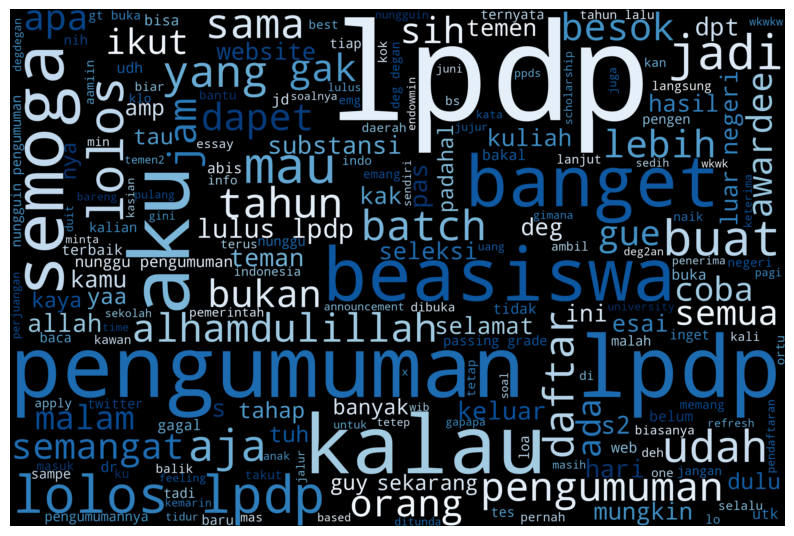

In [134]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(worldcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(worldcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in df_june['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

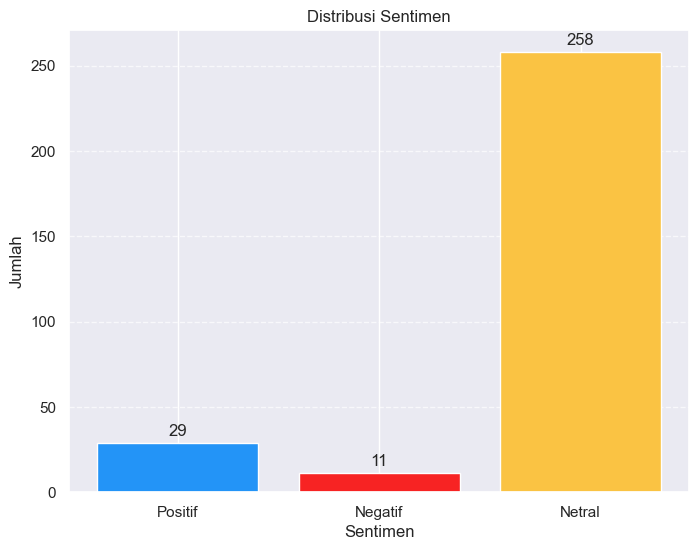

In [135]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                                   xytext=(0, 3),
                                   textcoords="offset points",
                                   ha='center', va='bottom')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen")

# 6. Klasifikasi sentimen

In [136]:
df_label = pd.read_csv('labeling_june.csv')
df_label = df_label[['created_at', 'retweet_count', 'username', 'full_text', 'tokenized', 'klasifikasi']]
display(df_label)

,created_at,retweet_count,username,full_text,tokenized,klasifikasi
0,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...,sending virtual hug ayo peluk bareng moga reje...,Netral
1,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph candidate of leiden university a...,officially ph candidate of leiden university a...,Netral
2,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan negeri tiap tahun evaluasinya mas prodi...,bahkan negeri tiap tahun evaluasi mas prodi ru...,Netral
3,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...,bangkeeeee gin rasa lolos lpdp saat cari sekolah,Netral
4,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia senang liat orang orang keterima beasi...,bahagia senang liat orang orang terima beasisw...,Netral
...,...,...,...,...,...,...
293,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet esai iisma moti...,open joki esai beasiswa motlet esai iisma moti...,Positif
294,2024-06-09 02:24:20+00:00,0,reinaldomaramis,lpdp sama hospital based kalau emang niat lanj...,lpdp sama hospital based kalau emang niat lanj...,Netral
295,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya pake lpdp orang cerdas tu pola pi...,apa salah pake lpdp orang cerdas tu pola pikir...,Netral
296,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet se...,privilege tuh cari usaha bukan dapet sendiri e...,Netral


In [137]:
#tokenized = df_label['tokenized']

#tokenized.to_csv('tokenized.csv')

In [138]:
df_label = pd.read_csv('labeling_june.csv')

dataset = df_label.drop(['full_text', 'username', 'retweet_count', 'created_at'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [139]:
dataset

[(np.int64(2003),
  'sending virtual hug ayo peluk bareng moga rejekinya lpdp batch lanjut',
  'Netral'),
 (np.int64(2004),
  'officially ph candidate of leiden university and lpdp awardee',
  'Netral'),
 (np.int64(2005),
  'bahkan negeri tiap tahun evaluasi mas prodi rutin undang buat share progress awardee lpdp ambil kuliah di prodi',
  'Netral'),
 (np.int64(2006),
  'bangkeeeee gin rasa lolos lpdp saat cari sekolah',
  'Netral'),
 (np.int64(2007),
  'bahagia senang liat orang orang terima beasiswa lpdp aku nanya teman kelas ku dulu terima engga kira kira',
  'Netral'),
 (np.int64(2008),
  'periode kemarin passing grade lpdp 860 periode 1000 skor 955 gak sanggup',
  'Netral'),
 (np.int64(2009),
  'senior sekaligus teman kecil awak lulus lpdp alhamdulillah beliau nih ngasih testimoni mock up sama lo santai banget beneran paling mirip sama interview asli hahahaha alhamdulillah ikut bangga bahagia',
  'Positif'),
 (np.int64(2010),
  'mentor nyala memang kl sdh saat mau amp siap daftar l

In [140]:
# import random

# set_positif = []
# set_negatif = []
# set_netral = []

# for n in dataset:
#     if n[1] == 'Positif':
#         set_positif.append(n)
#     elif n[1] == 'Negatif':
#         set_negatif.append(n)
#     else:
#         set_netral.append(n)

# set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
# set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
# set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

# train = set_positif + set_negatif + set_netral

# train_set = []

# for n in train:
#     train_set.append(n)

In [141]:
# import pandas as pd
# import random
# from textblob.classifiers import NaiveBayesClassifier

# # Load and prepare the dataset
# df_label = pd.read_csv('labeling_june.csv')

# # Drop unwanted columns
# dataset = df_label.drop(['full_text', 'username', 'retweet_count', 'created_at', 'Unnamed: 0'], axis=1, inplace=False)
# dataset = [tuple(x) for x in dataset.to_records(index=False)]

# # Clean the dataset to ensure all elements are strings
# cleaned_dataset = [(str(text), str(label)) for text, label in dataset if pd.notnull(text) and pd.notnull(label)]

# # Split the dataset into positive, negative, and neutral sets
# set_positif = [n for n in cleaned_dataset if n[1] == 'Positif']
# set_negatif = [n for n in cleaned_dataset if n[1] == 'Negatif']
# set_netral = [n for n in cleaned_dataset if n[1] == 'Netral']

# # Sample the data
# set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
# set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
# set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

# # Combine the sampled data into a training set
# train = set_positif + set_negatif + set_netral

# # Train the NaiveBayesClassifier
# cl = NaiveBayesClassifier(train)

# # Calculate and print the accuracy
# print("Akurasi Test: ", cl.accuracy(cleaned_dataset))


In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from textblob.classifiers import NaiveBayesClassifier
import random

# Load and prepare the dataset
df_label = pd.read_csv('labeling_june.csv')

# Drop unwanted columns
dataset = df_label.drop(['full_text', 'username', 'retweet_count', 'created_at', 'Unnamed: 0'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

# Clean the dataset to ensure all elements are strings
cleaned_dataset = [(str(text), str(label)) for text, label in dataset if pd.notnull(text) and pd.notnull(label)]

# Split the dataset into train and test sets
train_set, test_set = train_test_split(cleaned_dataset, test_size=0.2, stratify=[label for text, label in cleaned_dataset], random_state=42)

# Train the NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)

# Calculate and print the accuracy on the test set
print("Akurasi Test: ", cl.accuracy(test_set))

# Labeling
data_tweet = list(df_label['tokenized'].dropna().astype(str))

status = []
total_positif = 0
total_negatif = 0
total_netral = 0
total = 0

for tweet in data_tweet:
    analysis = TextBlob(tweet, classifier=cl)
    classification = analysis.classify()

    if classification == 'Positif':
        total_positif += 1
    elif classification == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(classification)
    total += 1

# Print the results
print(f'\nHasil Analisis Data:\nPositif {total_positif}\nNetral {total_netral}\nNegatif {total_negatif}')
print(f'\nTotal Data: {total}')


Akurasi Test:  0.8666666666666667

Hasil Analisis Data:
Positif 14
Netral 278
Negatif 4

Total Data: 296


In [143]:
df_label['tokenized']

0      sending virtual hug ayo peluk bareng moga reje...
1      officially ph candidate of leiden university a...
2      bahkan negeri tiap tahun evaluasi mas prodi ru...
3       bangkeeeee gin rasa lolos lpdp saat cari sekolah
4      bahagia senang liat orang orang terima beasisw...
                             ...                        
293    open joki esai beasiswa motlet esai iisma moti...
294    lpdp sama hospital based kalau emang niat lanj...
295    apa salah pake lpdp orang cerdas tu pola pikir...
296    privilege tuh cari usaha bukan dapet sendiri e...
297    kalau sekadar spesialis kan banyak bidang mina...
Name: tokenized, Length: 298, dtype: object

In [144]:
#Labeling
import pandas as pd
from textblob import TextBlob

# Load the dataset
df_label = pd.read_csv('labeling_june.csv')

# Ensure the 'tokenized' column has no missing values and all entries are strings
data_tweet = df_label['tokenized'].dropna().astype(str).tolist()

# Initialize counters and lists
status = []
total_positif = 0
total_negatif = 0
total_netral = 0
total = 0

# Classify each tweet
for tweet in data_tweet:
    analysis = TextBlob(tweet, classifier=cl)
    classification = analysis.classify()

    if classification == 'Positif':
        total_positif += 1
    elif classification == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(classification)
    total += 1

# Print the results
print(f'\nHasil Analisis Data:\nPositif {total_positif}\nNetral {total_netral}\nNegatif {total_negatif}')
print(f'\nTotal Data: {total}')



Hasil Analisis Data:
Positif 14
Netral 278
Negatif 4

Total Data: 296


In [145]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
df_label['klasifikasi_bayes'] = status

df_label

,Unnamed: 0,created_at,retweet_count,username,full_text,tokenized,klasifikasi,klasifikasi_bayes
0,2003,2024-06-10 23:40:04+00:00,0,geeeziye,sending virtual hug ayo pelukan bareng semoga ...,sending virtual hug ayo peluk bareng moga reje...,Netral,Netral
1,2004,2024-06-10 23:37:57+00:00,478,visceralstars,officially ph candidate of leiden university a...,officially ph candidate of leiden university a...,Netral,Netral
2,2005,2024-06-10 23:34:56+00:00,1,rcahyantari,bahkan negeri tiap tahun evaluasinya mas prodi...,bahkan negeri tiap tahun evaluasi mas prodi ru...,Netral,Netral
3,2006,2024-06-10 23:32:29+00:00,1,bakteribayk,bangkeeeee gini rasanya lolos lpdp saatnya car...,bangkeeeee gin rasa lolos lpdp saat cari sekolah,Netral,Netral
4,2007,2024-06-10 23:30:18+00:00,0,hairba_nd_,bahagia senang liat orang orang keterima beasi...,bahagia senang liat orang orang terima beasisw...,Netral,Netral
...,...,...,...,...,...,...,...,...
293,2296,2024-06-09 02:42:52+00:00,0,cinephileperiod,open joki esai beasiswa motlet esai iisma moti...,open joki esai beasiswa motlet esai iisma moti...,Positif,Netral
294,2297,2024-06-09 02:24:20+00:00,0,reinaldomaramis,lpdp sama hospital based kalau emang niat lanj...,lpdp sama hospital based kalau emang niat lanj...,Netral,Netral
295,2298,2024-06-09 02:09:58+00:00,0,galuhnakulo,apa salahnya pake lpdp orang cerdas tu pola pi...,apa salah pake lpdp orang cerdas tu pola pikir...,Netral,Netral
296,2299,2024-06-09 02:07:36+00:00,0,llavenderfog,privilege tuh dicari diusahakan bukan dapet se...,privilege tuh cari usaha bukan dapet sendiri e...,Netral,NaN


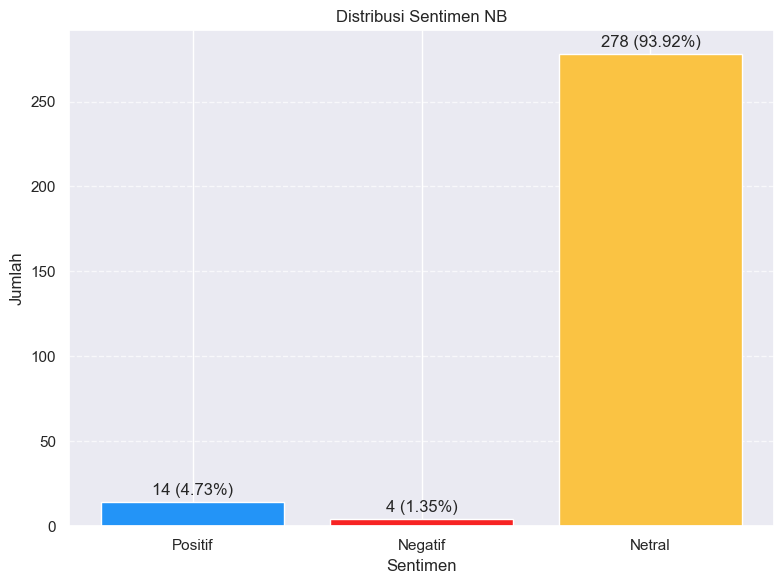

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for a more professional look
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]
total = total_positif + total_negatif + total_netral

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Add percentage annotations
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f"{count:,.0f} ({count / total * 100:.2f}%)",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Add grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add axis labels and title
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.tight_layout()
    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen NB")

